In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
# Connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import clear_output

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/temp'
df = pd.read_csv(folder_path + '/crypto_data_daily_cleaned_v1.csv')

# 10 currencies included: 'BTC', 'ETH', 'XRP', 'ADA', 'LTC', 'LINK', 'XLM', 'TRX', 'XMR', 'ETC'

## Data Preprocessing

In [ ]:
# Extract informations from date and time
df['year'] = pd.DatetimeIndex(df['Open Time']).year
df['month'] = pd.DatetimeIndex(df['Open Time']).month
df['day'] = pd.DatetimeIndex(df['Open Time']).day
df['weekday'] = pd.DatetimeIndex(df['Open Time']).dayofweek

In [ ]:
df['pct_change'] = (df['Close'] - df['Open'])/df['Open']

In [ ]:
# train / test data for simple regressions
df_1 = df.sort_values(by=['Open Time', 'Crypto'], ascending=True)
df_1 = df_1[['pct_change', 'train_test']]
df_1 = df_1.reset_index()

from sklearn.model_selection import train_test_split
train_data_1, test_data_1 = train_test_split(df_1, test_size=0.2, shuffle=False)

train_data_1 = train_data_1.drop(['train_test'], axis=1).dropna()
test_data_1 = test_data_1.drop(['train_test'], axis=1).dropna()

,level_0,index,pct_change,train_test
0,0,0,0.124470,Train
1,1,1,0.174714,Train
2,2,2,0.020317,Train
3,3,3,0.080733,Train
4,4,4,0.051397,Train
...,...,...,...,...
20741,20741,11682,-0.010212,Test
20742,20742,16553,-0.000328,Test
20743,20743,14738,-0.008225,Test
20744,20744,18648,-0.005195,Test


# Time Series Modeling

Measurement Tools (MAE, MSE, RMSE)

In [ ]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))

def MSE(y_true, y_pred):
    return np.mean(np.square(y_true-y_pred))

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true-y_pred)))

ARIMA Regression

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_1["pct_change"].values, order=(0, 1, 0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                16595
Model:                 ARIMA(0, 1, 0)   Log Likelihood               17603.876
Method:                           css   S.D. of innovations              0.084
Date:                Fri, 18 Nov 2022   AIC                         -35203.751
Time:                        19:31:55   BIC                         -35188.317
Sample:                             1   HQIC                        -35198.656
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.346e-06      0.001     -0.008      0.993      -0.001       0.001
==============================================================================
"""

In [ ]:
## Find the best parameter pdq
import statsmodels.api as sm
import itertools

print('Examples of parameter combinations for ARIMA...')
p = range(0, 1)
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

aic=[]
for i in pdq:
    model = sm.tsa.arima.ARIMA(train_data_1["pct_change"].values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic, 2))

Examples of parameter combinations for ARIMA...
ARIMA: (0, 0, 0) >> AIC : -40028.91
ARIMA: (0, 0, 1) >> AIC : -41323.86
ARIMA: (0, 0, 2) >> AIC : -42176.8


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA: (0, 1, 0) >> AIC : -35205.75
ARIMA: (0, 1, 1) >> AIC : -41974.02
ARIMA: (0, 1, 2) >> AIC : -41999.94
ARIMA: (0, 2, 0) >> AIC : -17082.86
ARIMA: (0, 2, 1) >> AIC : -35189.64
ARIMA: (0, 2, 2) >> AIC : -41954.76


In [ ]:
print('Examples of parameter combinations for ARIMA...')
p = range(1, 2)
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

aic=[]
for i in pdq:
    model = sm.tsa.arima.ARIMA(train_data_1["pct_change"].values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic, 2))

Examples of parameter combinations for ARIMA...


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA: (1, 0, 0) >> AIC : -41957.01
ARIMA: (1, 0, 1) >> AIC : -43041.9
ARIMA: (1, 0, 2) >> AIC : -43126.4
ARIMA: (1, 1, 0) >> AIC : -39761.96
ARIMA: (1, 1, 1) >> AIC : -42083.32
ARIMA: (1, 1, 2) >> AIC : -41970.93
ARIMA: (1, 2, 0) >> AIC : -27254.21
ARIMA: (1, 2, 1) >> AIC : -39744.4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA: (1, 2, 2) >> AIC : -42053.6


In [ ]:
print('Examples of parameter combinations for ARIMA...')
p = range(2, 3)
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

aic=[]
for i in pdq:
    model = sm.tsa.arima.ARIMA(train_data_1["pct_change"].values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic, 2))

Examples of parameter combinations for ARIMA...
ARIMA: (2, 0, 0) >> AIC : -42888.91
ARIMA: (2, 0, 1) >> AIC : -43118.42
ARIMA: (2, 0, 2) >> AIC : -43134.71
ARIMA: (2, 1, 0) >> AIC : -40986.44
ARIMA: (2, 1, 1) >> AIC : -42894.45


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA: (2, 1, 2) >> AIC : -43103.2


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA: (2, 2, 0) >> AIC : -31943.09
ARIMA: (2, 2, 1) >> AIC : -40968.22


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA: (2, 2, 2) >> AIC : -42736.58


In [ ]:
# Set the parameter combination as (0,2,0) according to the test results above
# Run ARIMA model

history = [x for x in list(train_data_1["pct_change"].values.astype("float"))]
predictions = list()

print("Predicting forward with ARIMA:\n")
for t in range(len(list(test_data_1["pct_change"].values.astype("float")))):
    # Initialize model
    model = ARIMA(history, order=(0,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    obs = list(test_data_1["pct_change"].values.astype("float"))[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

Predicting forward with ARIMA:



/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

ARIMA Regression Result
MAE: [0.05193575]
MSE: [0.00553243]
RMSE: [0.07438033]


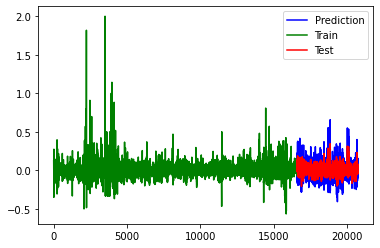

In [ ]:
errors = np.array(test_data_1["pct_change"].values)-np.array(predictions)

print("ARIMA Regression Result")
print("MAE:", MAE(test_data_1["pct_change"], predictions))
print("MSE:", MSE(test_data_1["pct_change"], predictions))
print("RMSE:", RMSE(test_data_1["pct_change"], predictions))


predictions = pd.Series(predictions)
predictions.index = test_data_1.index    

plt.plot(predictions, label="Prediction", color="b")
plt.plot(train_data_1["pct_change"], label="Train", color="g")
plt.plot(test_data_1["pct_change"], label="Test", color="r")
plt.legend()
plt.show()